# Κατέβασμα dataset και libraries

**Πρέπει να κάνετε upload το αρχείο kaggle.json στον φάκελο /content για να κατεβάσει το dataset**

In [ ]:
import os
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
os.environ['KAGGLE_CONFIG_DIR']='/content'

In [ ]:
!kaggle datasets download -d dhanushnarayananr/credit-card-fraud

 90% 26.0M/28.9M [00:00<00:00, 104MB/s] 
100% 28.9M/28.9M [00:00<00:00, 88.5MB/s]


In [ ]:
!unzip /content/credit-card-fraud.zip

Archive:  /content/credit-card-fraud.zip
  inflating: card_transdata.csv      


In [ ]:
!pip install pyspark
import pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=f0c3cf37dd266e6ac7ddc3f1ac100bcddff3291d1aa4ccedd099d0bc08b35924
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [ ]:
pd.read_csv('/content/card_transdata.csv')

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0


# Αρχή SparkSession και βασικά στοιχεία του dataset

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder.appName('Practise').getOrCreate()

In [ ]:
spark

In [ ]:
df=spark.read.csv('/content/card_transdata.csv',inferSchema =True,header=True)

In [ ]:
df.printSchema()
df.show(truncate=False)

root
 |-- distance_from_home: double (nullable = true)
 |-- distance_from_last_transaction: double (nullable = true)
 |-- ratio_to_median_purchase_price: double (nullable = true)
 |-- repeat_retailer: double (nullable = true)
 |-- used_chip: double (nullable = true)
 |-- used_pin_number: double (nullable = true)
 |-- online_order: double (nullable = true)
 |-- fraud: double (nullable = true)

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|57.87785658389723 |0.3111400080477545            |1.9459399775518593            |1.0            |1.0      |0.0            |0.0         |0.0  |
|10.829942699255545|0.175591

Conversion των int values se boolean και το class σε int

In [ ]:
df = df.selectExpr("cast (distance_from_home as double) distance_from_home",
                    "cast (distance_from_last_transaction as double) distance_from_last_transaction",
                    "cast (ratio_to_median_purchase_price as double) ratio_to_median_purchase_price",
                    "cast(repeat_retailer as boolean) repeat_retailer",
                    "cast(used_chip as boolean) used_chip",
                    "cast(used_pin_number as boolean) used_pin_number",
                    "cast(online_order as boolean) online_order",
                    "cast(fraud as int) fraud")

In [ ]:
df.printSchema()
df.show(truncate=False)

root
 |-- distance_from_home: double (nullable = true)
 |-- distance_from_last_transaction: double (nullable = true)
 |-- ratio_to_median_purchase_price: double (nullable = true)
 |-- repeat_retailer: boolean (nullable = true)
 |-- used_chip: boolean (nullable = true)
 |-- used_pin_number: boolean (nullable = true)
 |-- online_order: boolean (nullable = true)
 |-- fraud: integer (nullable = true)

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|57.87785658389723 |0.3111400080477545            |1.9459399775518593            |true           |true     |false          |false       |0    |
|10.829942699255545|0.1

# Visualisation του Dataset
Χρησιμοποιώντας τα libraries pandas και matplotlib

In [ ]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
distance_from_home,57.877857,10.829943,5.091079,2.247564,44.190936
distance_from_last_transaction,0.31114,0.175592,0.805153,5.600044,0.566486
ratio_to_median_purchase_price,1.94594,1.294219,0.427715,0.362663,2.222767
repeat_retailer,True,True,True,True,True
used_chip,True,False,False,True,True
used_pin_number,False,False,False,False,False
online_order,False,False,True,True,True
fraud,0,0,0,0,0


In [ ]:
df.groupBy('fraud').count().show()

+-----+------+
|fraud| count|
+-----+------+
|    1| 87403|
|    0|912597|
+-----+------+



In [ ]:
pandas_df = df.toPandas()


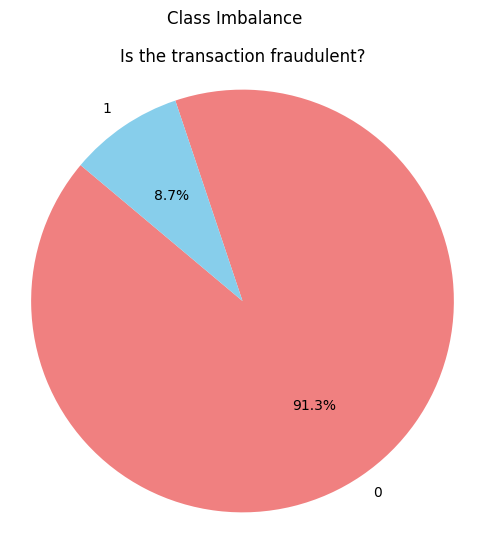

In [ ]:
colors = ['lightcoral', 'skyblue']
fraud_counts = pandas_df['fraud'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(fraud_counts,colors=colors, labels=fraud_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Is the transaction fraudulent?')
plt.suptitle('Class Imbalance')
plt.show()

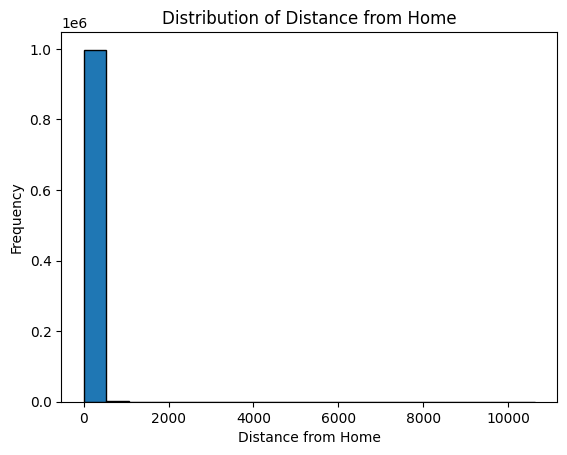

In [ ]:
plt.hist(pandas_df['distance_from_home'], bins=20, edgecolor='black')
plt.xlabel('Distance from Home')
plt.ylabel('Frequency')
plt.title('Distribution of Distance from Home')
plt.show()

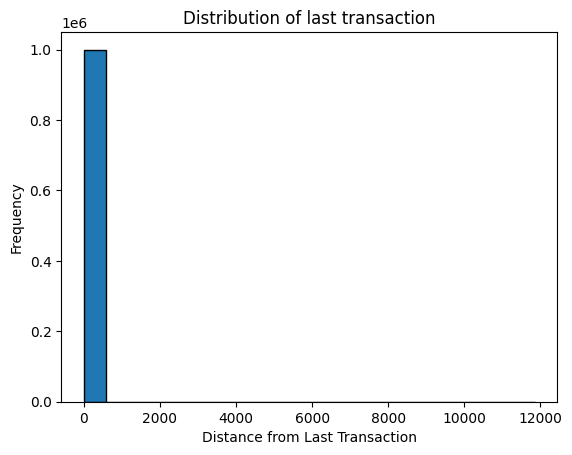

In [ ]:
plt.hist(pandas_df['distance_from_last_transaction'], bins=20, edgecolor='black')
plt.xlabel('Distance from Last Transaction')
plt.ylabel('Frequency')
plt.title('Distribution of last transaction')
plt.show()

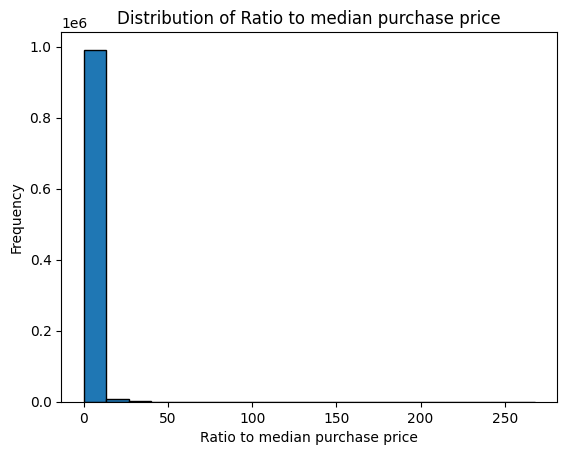

In [ ]:
plt.hist(pandas_df['ratio_to_median_purchase_price'], bins=20, edgecolor='black')
plt.xlabel('Ratio to median purchase price')
plt.ylabel('Frequency')
plt.title('Distribution of Ratio to median purchase price')
plt.show()

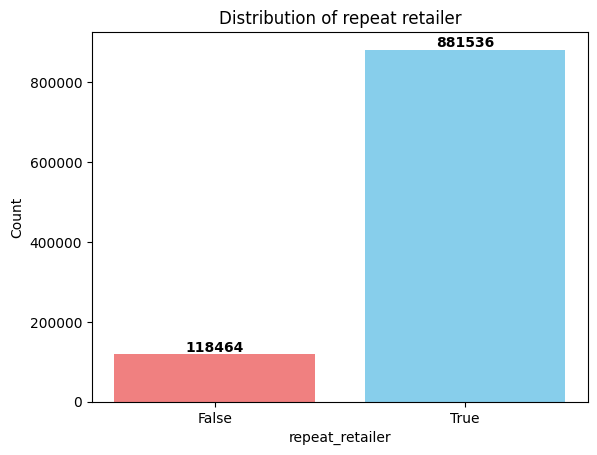

In [ ]:
repeat_retailer = pandas_df['repeat_retailer'].value_counts()
repeat_retailer = repeat_retailer.sort_index(ascending=True)
plt.bar(repeat_retailer.index.astype(str), repeat_retailer, color=colors)
plt.xlabel('repeat_retailer')
plt.ylabel('Count')
plt.title('Distribution of repeat retailer')
for i, v in enumerate(repeat_retailer):
    plt.text(i, v + 10, str(v), color='black', fontweight='bold', ha='center', va='bottom')

plt.show()

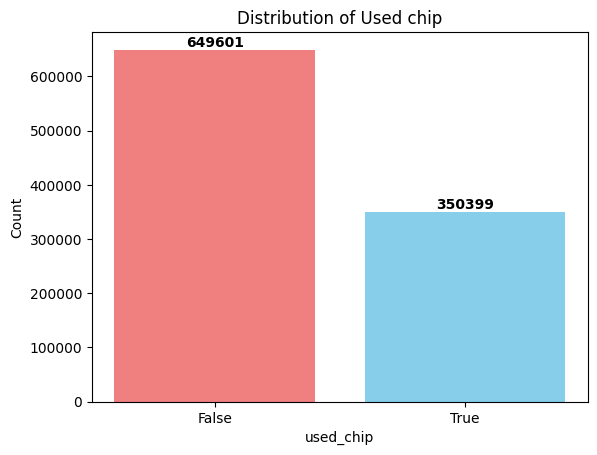

In [ ]:
used_chip = pandas_df['used_chip'].value_counts()
used_chip = used_chip.sort_index(ascending=True)
plt.bar(used_chip.index.astype(str), used_chip, color=colors)
plt.xlabel('used_chip')
plt.ylabel('Count')
plt.title('Distribution of Used chip')
for i, v in enumerate(used_chip):
    plt.text(i, v+10, str(v), color='black', fontweight='bold', ha='center', va='bottom')
plt.show()

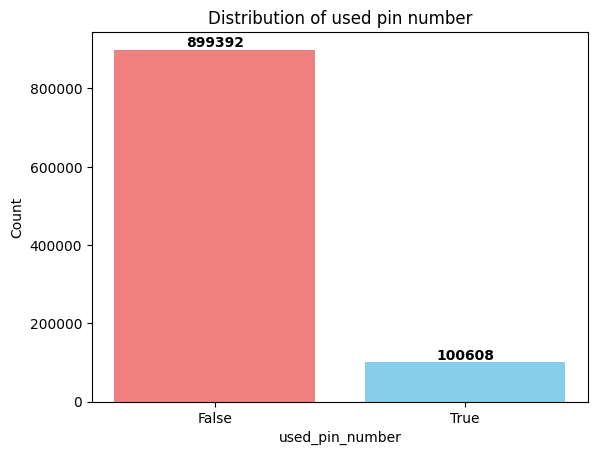

In [ ]:
used_pin_number = pandas_df['used_pin_number'].value_counts()
used_pin_number = used_pin_number.sort_index(ascending=True)
plt.bar(used_pin_number.index.astype(str), used_pin_number, color=colors)
plt.xlabel('used_pin_number')
plt.ylabel('Count')
plt.title('Distribution of used pin number')
for i, v in enumerate(used_pin_number):
    plt.text(i, v+10, str(v), color='black', fontweight='bold', ha='center', va='bottom')
plt.show()

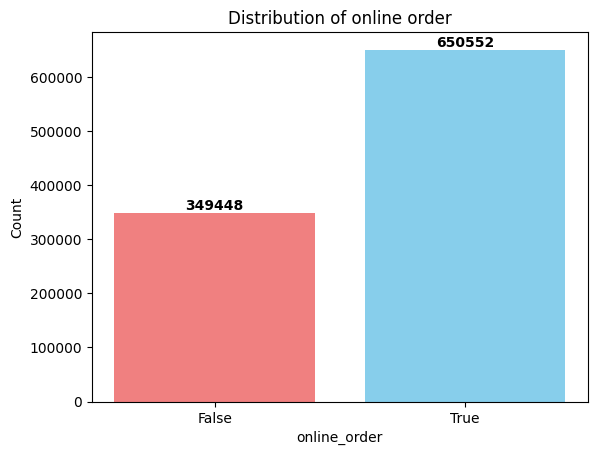

In [ ]:
online_order = pandas_df['online_order'].value_counts()
online_order = online_order.sort_index(ascending=True)
plt.bar(online_order.index.astype(str), online_order, color=colors)
plt.xlabel('online_order')
plt.ylabel('Count')
plt.title('Distribution of online order')
for i, v in enumerate(online_order):
    plt.text(i, v+10, str(v), color='black', fontweight='bold', ha='center', va='bottom')
plt.show()

<Axes: >

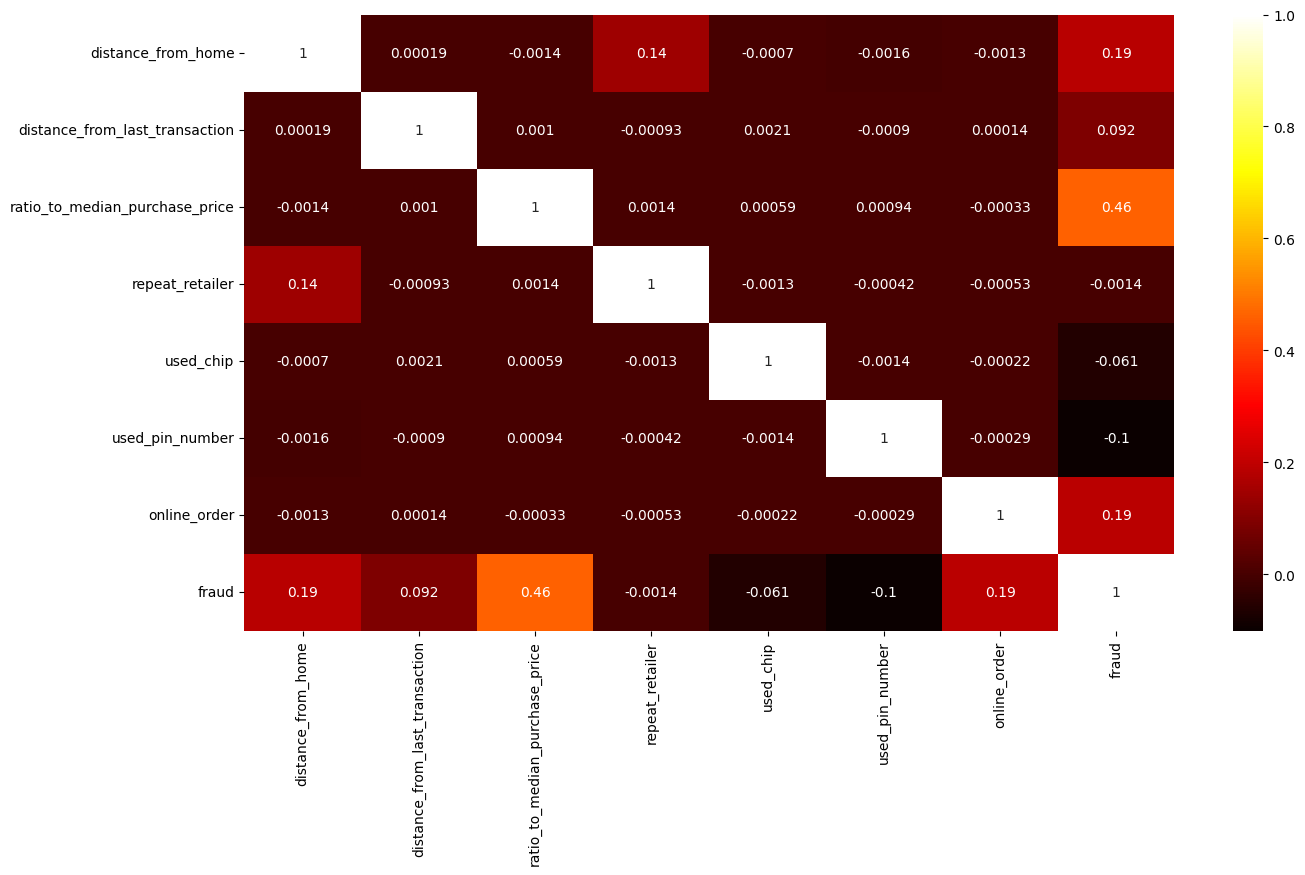

In [ ]:
corr = pandas_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "hot")

# Data preprocessing
(Όχι ολόκληρο μόνο χωρισμός dataset)


In [ ]:
#Duplicate removal (δεν περιέχει το dataset)
df2 = df.dropDuplicates()

Tο outlier removal ουσιαστικά μου καταστρέφει το dataset γιατί διαγράφει όλα τα transaction που είναι fraud. Αφαιρέστε τα σύμβολα """ στην αρχή και στο τέλος για την εκτέλεση.

In [ ]:
"""
from pyspark.sql.functions import col


def remove_outliers_iqr(df, columns_to_check):
    filtered_df = df

    for col_name in columns_to_check:
        # Calculate quartiles for the current column
        quantiles = filtered_df.approxQuantile(col_name, [0.25, 0.75], 0.05)  # Adjust relativeError as needed

        # Calculate IQR
        q1 = quantiles[0]
        q3 = quantiles[1]
        iqr = q3 - q1

        # Define the lower and upper bounds to filter outliers
        lower_bound = q1 - (1.5 * iqr)
        upper_bound = q3 + (1.5 * iqr)

        # Filter outliers for the current column
        filtered_df = filtered_df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))

    return filtered_df

# Assuming you have a DataFrame named 'df' with columns 'column1', 'column2', and 'column3'
columns_to_check = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']

# Get the filtered DataFrame with outliers removed
result_filtered_df = remove_outliers_iqr(df, columns_to_check)

# Show the resulting filtered DataFrame
result_filtered_df.show()
result_filtered_df.groupBy('fraud').count().show()
"""

"\nfrom pyspark.sql.functions import col\n\n\ndef remove_outliers_iqr(df, columns_to_check):\n    filtered_df = df\n\n    for col_name in columns_to_check:\n        # Calculate quartiles for the current column\n        quantiles = filtered_df.approxQuantile(col_name, [0.25, 0.75], 0.05)  # Adjust relativeError as needed\n\n        # Calculate IQR\n        q1 = quantiles[0]\n        q3 = quantiles[1]\n        iqr = q3 - q1\n\n        # Define the lower and upper bounds to filter outliers\n        lower_bound = q1 - (1.5 * iqr)\n        upper_bound = q3 + (1.5 * iqr)\n\n        # Filter outliers for the current column\n        filtered_df = filtered_df.filter((col(col_name) >= lower_bound) & (col(col_name) <= upper_bound))\n\n    return filtered_df\n\n# Assuming you have a DataFrame named 'df' with columns 'column1', 'column2', and 'column3'\ncolumns_to_check = ['distance_from_home', 'distance_from_last_transaction', 'ratio_to_median_purchase_price']\n\n# Get the filtered DataFrame with 

Χωρισμός train set με test set με Stratified splitting

In [ ]:
# 'data' represents your original dataset
from pyspark.sql.functions import lit
# Calculate fractions for each stratum
fractions = df.select("fraud").distinct().withColumn("fraction", lit(0.8)).rdd.collectAsMap()

# Perform stratified sampling using sampleBy
training_df = df.sampleBy("fraud", fractions, seed=0)
# Subtract the training data to get the testing data
testing_df = df.subtract(training_df)
training_df.show(truncate=False)
testing_df.show(truncate=False)

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+
|57.87785658389723 |0.3111400080477545            |1.9459399775518593            |true           |true     |false          |false       |0    |
|10.829942699255545|0.17559150228166587           |1.2942188106198573            |true           |false    |false          |false       |0    |
|5.091079490616996 |0.8051525945853258            |0.42771456119427587           |true           |false    |false          |true        |0    |
|2.2475643282963613|5.60004354707232              |0.36266257805709584           |true           |true     |false          |true        

In [ ]:
training_df.groupBy('fraud').count().show()
testing_df.groupBy('fraud').count().show()

+-----+------+
|fraud| count|
+-----+------+
|    1| 69846|
|    0|729489|
+-----+------+

+-----+------+
|fraud| count|
+-----+------+
|    1| 17557|
|    0|183108|
+-----+------+



# StandardScaler

In [ ]:
from pyspark.ml.feature import StandardScaler, VectorAssembler


# Assemble features into a vector
assembler = VectorAssembler(inputCols=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"], outputCol="features_vector")
training_df = assembler.transform(training_df)

# Initialize StandardScaler
scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features", withStd=True, withMean=True)

# generate the scaler model
scaler_model = scaler.fit(training_df)

# scale the features
training_df = scaler_model.transform(training_df)

training_df.show(truncate=False)

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+-----------------------------------------------------------+----------------------------------------------------------------+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|features_vector                                            |scaled_features                                                 |
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+-----------------------------------------------------------+----------------------------------------------------------------+
|57.87785658389723 |0.3111400080477545            |1.9459399775518593            |true           |true     |false          |false       |0    |[57.87785658389723,0.3111400080477545,1.9459399775

StandardScaler στο training dataframe

In [ ]:
# Assemble features into a vector
assembler = VectorAssembler(inputCols=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"], outputCol="features_vector")
testing_df = assembler.transform(testing_df)

# Initialize the StandardScaler
scaler = StandardScaler(inputCol="features_vector", outputCol="scaled_features", withStd=True, withMean=True)

# Compute summary statistics and generate the scaler model
scaler_model = scaler.fit(testing_df)

# Scale the features
testing_df = scaler_model.transform(testing_df)

testing_df.show(truncate=False)

+-------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+------------------------------------------------------------+----------------------------------------------------------------+
|distance_from_home |distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|features_vector                                             |scaled_features                                                 |
+-------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+------------------------------------------------------------+----------------------------------------------------------------+
|0.16626312507678476|22.984441723844544            |0.30337529992188317           |false          |false    |false          |true        |0    |[0.16626312507678476,22.984441723844544,0.3

# MinMaxScaler
Για τον NaiveBayes

!Aν έχετε κάνει ήδη την StandardScaler ξανατρέξτε την Data preprocessing για να διαγραφtεί η Scaled_features και έπειτα τα υπόλοιπα modules!

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler


# Assemble features into a vector
assembler = VectorAssembler(inputCols=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"], outputCol="features_vector")
training_df = assembler.transform(training_df)

# Initialize StandardScaler
scaler = MinMaxScaler(inputCol="features_vector", outputCol="scaled_features")

# generate the scaler model
scaler_model = scaler.fit(training_df)

# scale the features
training_df = scaler_model.transform(training_df)

training_df.show(truncate=False)

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+-----------------------------------------------------------+------------------------------------------------------------------+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|features_vector                                            |scaled_features                                                   |
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+-----------------------------------------------------------+------------------------------------------------------------------+
|57.87785658389723 |0.3111400080477545            |1.9459399775518593            |true           |true     |false          |false       |0    |[57.87785658389723,0.3111400080477545,1.9459

In [ ]:
from pyspark.ml.feature import MinMaxScaler, VectorAssembler


# Assemble features into a vector
assembler = VectorAssembler(inputCols=["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"], outputCol="features_vector")
testing_df = assembler.transform(testing_df)

# Initialize StandardScaler
scaler = MinMaxScaler(inputCol="features_vector", outputCol="scaled_features")

# generate the scaler model
scaler_model = scaler.fit(testing_df)

# scale the features
testing_df = scaler_model.transform(testing_df)

testing_df.show(truncate=False)

+-------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+------------------------------------------------------------+-------------------------------------------------------------------+
|distance_from_home |distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|features_vector                                             |scaled_features                                                    |
+-------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+------------------------------------------------------------+-------------------------------------------------------------------+
|0.16626312507678476|22.984441723844544            |0.30337529992188317           |false          |false    |false          |true        |0    |[0.16626312507678476,22.9844417238

# Oversampling
Διαλέγετε oversampling ή undersampling

Το τελικο dataset είναι το balanced_df

Προσπάθησα να κάνω oversample με την τεχνική του SMOTE μετατρέποντας το dataframe σε pandas πρώτα αλλά εν τέλη δεν μου δούλευε οπότε αποφάσησα να το κάνω απλά με το sampleBy.

In [ ]:
"""
from imblearn.over_sampling import SMOTE

pandas_scaled = scaled_data.select("fraud", "scaled_features").toPandas()
X = pandas_scaled["scaled_features"]
y = pandas_scaled["fraud"]

smote = SMOTE(sampling_strategy = 'minority', random_state = 42)

X_resampled, y_resampled = smote.fit_resample(X, y)

balanced_df = pd.concat([pd.DataFrame(X_resampled, columns=["distance_from_home ", "distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]), pd.DataFrame(y_resampled, columns=["label"])], axis=1)
balanced_df = spark.createDataFrame(balanced_pandas_df)

"""

'\nfrom imblearn.over_sampling import SMOTE\n\npandas_scaled = scaled_data.select("fraud", "scaled_features").toPandas()\nX = pandas_scaled["scaled_features"]\ny = pandas_scaled["fraud"]\n\nsmote = SMOTE(sampling_strategy = \'minority\', random_state = 42)\n\nX_resampled, y_resampled = smote.fit_resample(X, y)\n\nbalanced_df = pd.concat([pd.DataFrame(X_resampled, columns=["distance_from_home ", "distance_from_last_transaction","ratio_to_median_purchase_price","repeat_retailer","used_chip","used_pin_number","online_order"]), pd.DataFrame(y_resampled, columns=["label"])], axis=1)\nbalanced_df = spark.createDataFrame(balanced_pandas_df)\n\n'

In [ ]:
# Πηγή https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253
# Το dataset δεν είναι ακριβώς 50-50 αλλά οι άλλες τεχνικές που βρίκα για παράδειγμα με το sampleBy() και sample() δεν κατάφερα να τις κάνω να δουλέψουν
# https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.sample.html

from pyspark.sql.functions import col, explode, array, lit

major_df = training_df.filter(col('fraud') == 0)
minor_df = training_df.filter(col('fraud') == 1)

ratio = int(major_df.count()/minor_df.count())
print("ratio: {}".format(ratio))
a = range(ratio)
# duplicate the minority rows
oversampled = minor_df.withColumn("dummy", explode(array([lit(x) for x in a]))).drop('dummy')
# combine both oversampled minority rows and previous majority rows
balanced_df = major_df.unionAll(oversampled)
balanced_df.show()

balanced_df.groupBy('fraud').count().show()

ratio: 10
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+--------------------+--------------------+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|     features_vector|     scaled_features|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+--------------------+--------------------+
| 57.87785658389723|            0.3111400080477545|            1.9459399775518593|           true|     true|          false|       false|    0|[57.8778565838972...|[0.00544291477082...|
|10.829942699255545|           0.17559150228166587|            1.2942188106198573|           true|    false|          false|       false|    0|[10.8299426992555...|[0.00101809034170...|
| 5.091079490616996|            0.8051525945853258|         

# Undersampling

In [ ]:
# Πηγή https://medium.com/@junwan01/oversampling-and-undersampling-with-pyspark-5dbc25cdf253
# Το dataset δεν είναι ακριβώς 50-50 αλλά οι άλλες τεχνικές που βρίκα για παράδειγμα με το sampleBy() και sample() δεν κατάφερα να τις κάνω να δουλέψουν
# https://spark.apache.org/docs/3.1.2/api/python/reference/api/pyspark.sql.DataFrame.sample.html

from pyspark.sql.functions import col

major_df = training_df.filter(col('fraud') == 0)
minor_df = training_df.filter(col('fraud') == 1)
ratio = int(major_df.count()/minor_df.count())

sampled_majority_df = major_df.sample(False, 1/ratio)
balanced_df = sampled_majority_df.unionAll(minor_df)

balanced_df.show()

balanced_df.groupBy('fraud').count().show()

+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+--------------------+--------------------+
|distance_from_home|distance_from_last_transaction|ratio_to_median_purchase_price|repeat_retailer|used_chip|used_pin_number|online_order|fraud|     features_vector|     scaled_features|
+------------------+------------------------------+------------------------------+---------------+---------+---------------+------------+-----+--------------------+--------------------+
| 56.59109468035227|            0.7183858907011721|            0.7368831105145712|           true|    false|          false|        true|    0|[56.5910946803522...|[0.44836795511240...|
| 67.59186117206991|            1.6129955621122185|           0.20704300451945304|           true|     true|          false|       false|    0|[67.5918611720699...|[0.61345764147287...|
|31.892352665494183|           0.12035236071547287|            0.34858

# Assemplers

Για training_df

In [ ]:
from pyspark.ml.feature import VectorAssembler

#Τα κάνω όλα asseble σε ένα column
assembler = VectorAssembler(inputCols=[
    'scaled_features', 'repeat_retailer', 'used_chip',
    'used_pin_number',
    'online_order'
                  ], outputCol='features')

# Consolidate predictor columns
assempled_df = assembler.transform(balanced_df)

assempled_df.select('features', 'fraud').show(truncate=False)

+--------------------------------------------------------------------------------+-----+
|features                                                                        |fraud|
+--------------------------------------------------------------------------------+-----+
|[0.44836795511240257,-0.16217650072904238,-0.3861048599982497,1.0,0.0,0.0,1.0]  |0    |
|[0.6134576414728705,-0.12839355979789197,-0.5743827889438619,1.0,1.0,0.0,0.0]   |0    |
|[0.07771127625271178,-0.18475990449047056,-0.5240858167665252,1.0,0.0,0.0,1.0]  |0    |
|[-0.3752056197418366,-0.10050567175753422,-0.458141061721219,0.0,0.0,0.0,1.0]   |0    |
|[-0.16659443290991344,-0.1517250891241035,-0.31219677276414803,1.0,1.0,0.0,1.0] |0    |
|[-0.23891627282318986,-0.17773523429039717,0.0333855343998426,1.0,0.0,0.0,0.0]  |0    |
|[0.14324702393059582,-0.18802371261700004,-0.3839157942979413,1.0,0.0,0.0,1.0]  |0    |
|[-0.35958962097340685,0.2390126836674621,-0.41188696382031914,1.0,0.0,0.0,0.0]  |0    |
|[-0.3524462739567864

Για testing_df

In [ ]:
from pyspark.ml.feature import VectorAssembler

#Τα κάνω όλα asseble σε ένα column
assembler = VectorAssembler(inputCols=[
    'scaled_features', 'repeat_retailer', 'used_chip',
    'used_pin_number',
    'online_order'
                  ], outputCol='features')

# Consolidate predictor columns
assempled_test_df = assembler.transform(testing_df)

assempled_test_df.select('features', 'fraud').show(truncate=False)

+--------------------------------------------------------------------------------+-----+
|features                                                                        |fraud|
+--------------------------------------------------------------------------------+-----+
|[-0.434091550499095,0.771995003015286,-0.555947325422475,0.0,0.0,0.0,1.0]       |0    |
|[-0.431107913654187,0.009055654578355358,-0.537839825822585,0.0,0.0,0.0,1.0]    |0    |
|(7,[0,1,2],[-0.4304804502046656,-0.20837161323317202,-0.4305684797706078])      |0    |
|[-0.43036065335594814,-0.009837478771210509,-0.5858743611968125,0.0,1.0,1.0,1.0]|0    |
|[-0.4302314119591402,-0.2129680374619377,-0.06780548554005823,0.0,0.0,0.0,1.0]  |0    |
|[-0.42949891315844047,-0.050621767095953035,0.06551984911525416,0.0,0.0,0.0,1.0]|0    |
|[-0.42916756601720724,-0.20938923845816174,-0.4174345680806525,0.0,0.0,0.0,1.0] |0    |
|[-0.4281563867752864,-0.1935389950619742,-0.22518881009604597,0.0,1.0,1.0,1.0]  |0    |
|(7,[0,1,2],[-0.42761

# Classification Algorithms
Μην τρέξετε την όλη την ενότητα. Διαλέξτε πιον αλγόριθμο θέλετε και έπειτα το Evaluation.

Decision tree

In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier

tree = DecisionTreeClassifier(labelCol="fraud", featuresCol="features")
tree_model = tree.fit(assempled_df)
prediction = tree_model.transform(assempled_test_df)

In [ ]:
print (tree_model.toDebugString)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_ce012383d07a, depth=5, numNodes=51, numClasses=2, numFeatures=7
  If (feature 2 <= 0.7861763374423032)
   If (feature 0 <= 1.1996907717771363)
    If (feature 1 <= 1.9915875433021775)
     If (feature 0 <= 0.7705733563876467)
      Predict: 0.0
     Else (feature 0 > 0.7705733563876467)
      If (feature 6 <= 0.5)
       Predict: 0.0
      Else (feature 6 > 0.5)
       Predict: 1.0
    Else (feature 1 > 1.9915875433021775)
     If (feature 6 <= 0.5)
      If (feature 0 <= 0.7705733563876467)
       Predict: 0.0
      Else (feature 0 > 0.7705733563876467)
       Predict: 1.0
     Else (feature 6 > 0.5)
      Predict: 1.0
   Else (feature 0 > 1.1996907717771363)
    If (feature 6 <= 0.5)
     If (feature 1 <= 0.6999157621055856)
      Predict: 0.0
     Else (feature 1 > 0.6999157621055856)
      If (feature 1 <= 1.9915875433021775)
       Predict: 0.0
      Else (feature 1 > 1.9915875433021775)
       Predict: 1.0
    Else (feat

Random Forest



In [ ]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(labelCol="fraud", featuresCol="features")
rf_model = rf.fit(assempled_df)
prediction = rf_model.transform(assempled_test_df)

In [ ]:
print (rf_model.toDebugString)

RandomForestClassificationModel: uid=RandomForestClassifier_879da88a7069, numTrees=20, numClasses=2, numFeatures=7
  Tree 0 (weight 1.0):
    If (feature 2 <= 0.7753993788305313)
     If (feature 6 <= 0.5)
      If (feature 1 <= 2.200635657120942)
       If (feature 0 <= 1.173494809943302)
        Predict: 0.0
       Else (feature 0 > 1.173494809943302)
        If (feature 1 <= 0.8077669612515421)
         Predict: 0.0
        Else (feature 1 > 0.8077669612515421)
         Predict: 1.0
      Else (feature 1 > 2.200635657120942)
       If (feature 0 <= 0.7079202098636247)
        Predict: 0.0
       Else (feature 0 > 0.7079202098636247)
        If (feature 5 <= 0.5)
         Predict: 1.0
        Else (feature 5 > 0.5)
         Predict: 0.0
     Else (feature 6 > 0.5)
      If (feature 1 <= 0.8077669612515421)
       If (feature 4 <= 0.5)
        If (feature 0 <= 0.7079202098636247)
         Predict: 0.0
        Else (feature 0 > 0.7079202098636247)
         Predict: 1.0
       Else (fea

Naive Bayes

In [ ]:
from pyspark.ml.classification import NaiveBayes

assempled_df.select('features', 'fraud').show(truncate=False)

nb = NaiveBayes(labelCol="fraud", featuresCol="features",modelType="multinomial")
nb_model = nb.fit(assempled_df)
prediction = nb_model.transform(assempled_test_df)

+-----------------------------------------------------------------------------------+-----+
|features                                                                           |fraud|
+-----------------------------------------------------------------------------------+-----+
|[0.0010180903417074804,1.48064867250249E-5,0.004811393639111344,1.0,0.0,0.0,0.0]   |0    |
|[7.598529831644789E-4,1.1651616558600332E-5,0.001392546946608059,1.0,0.0,1.0,0.0]  |0    |
|[0.0033163303754444873,7.177957667112849E-6,6.289953446499564E-4,1.0,1.0,0.0,1.0]  |0    |
|[0.0014754860891311847,3.524564936167063E-4,0.0012157740710807498,1.0,0.0,0.0,1.0] |0    |
|[0.0012684493958423377,0.0020947086131732325,0.03804602039824435,1.0,0.0,0.0,0.0]  |0    |
|[0.005215965388326405,6.169980238552437E-4,0.005027012925842969,1.0,0.0,0.0,1.0]   |0    |
|[1.7087128501688987E-4,5.3448669741584986E-5,0.011667552722053784,0.0,0.0,0.0,1.0] |0    |
|[0.004449386159973838,5.225380564445288E-4,0.0023070038824028476,1.0,1.0,0.0,0.

# Evaluation

In [ ]:
# take a look at the predictions
prediction.select('fraud', 'prediction', 'probability').show(5, False)

+-----+----------+-----------+
|fraud|prediction|probability|
+-----+----------+-----------+
|0    |0.0       |[1.0,0.0]  |
|0    |0.0       |[1.0,0.0]  |
|0    |0.0       |[1.0,0.0]  |
|0    |0.0       |[1.0,0.0]  |
|0    |0.0       |[1.0,0.0]  |
+-----+----------+-----------+
only showing top 5 rows



In [ ]:
#Πηγή https://goodboychan.github.io/python/datacamp/pyspark/machine_learning/2020/08/10/03-Classification-in-PySpark.html#Assembling-columns
prediction.groupBy('fraud', 'prediction').count().show()

# Calculate the elements of the confusion matrix
TN = prediction.filter('prediction = 0 AND fraud = prediction').count()
TP = prediction.filter('prediction = 1 AND fraud = prediction').count()
FN = prediction.filter('prediction = 0 AND fraud = 1').count()
FP = prediction.filter('prediction = 1 AND fraud = 0').count()

# Accuracy measures the proportion of correct predictions
accuracy = (TN + TP) / (TN + TP + FN + FP)
print(accuracy)


+-----+----------+------+
|fraud|prediction| count|
+-----+----------+------+
|    1|       0.0|     1|
|    0|       0.0|180325|
|    1|       1.0| 17556|
|    0|       1.0|  2783|
+-----+----------+------+

0.9861261306157028


TN = 180325
TP = 17556
FN = 1
FP = 2783
Accuracy = 0.9861261306157028
Misclassification = 0.013873869384297213
Precision= 0.8631692806922661
Sensitivity or Recall = 0.9999430426610468
Specificity = 0.9848013194398934


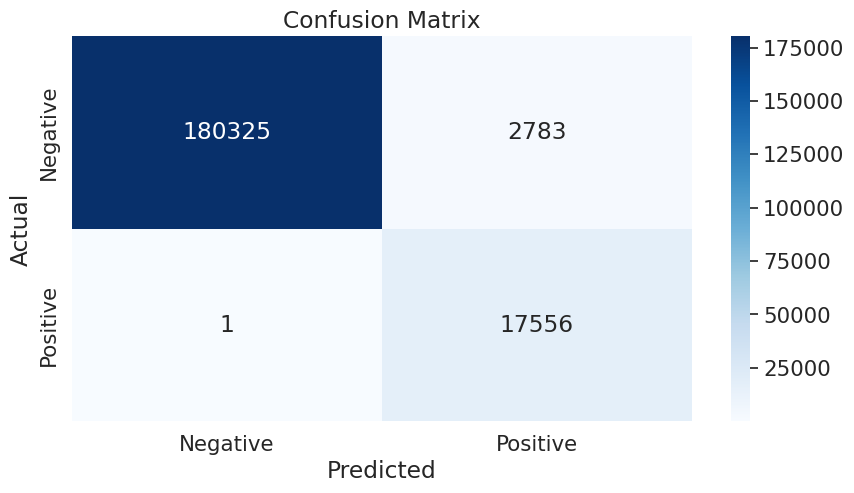

In [ ]:
print("TN =",TN)
print("TP =",TP)
print("FN =",FN)
print("FP =",FP)

print("Accuracy =", (TP + TN) / (TP + TN + FP + FN))
print("Misclassification =", (FP + FN) / (TP + TN + FP + FN))
print("Precision=", TP / (TP + FP))
print("Sensitivity or Recall =", TP / (TP + FN))
print("Specificity =",TN / (TN + FP))

from sklearn.metrics import confusion_matrix

#  [[true_negatives, false_positives],
#  [false_negatives, true_positives]]
conf_matrix_values = [[TN, FP],
                      [FN, TP]]
sns.set(font_scale=1.4)
plt.figure(figsize=(10, 5))
sns.heatmap(conf_matrix_values, annot=True, fmt='g', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()